<a href="https://colab.research.google.com/github/Raj123majumder/NER_project/blob/main/NER_CHAR_CRF_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 1.x
import pandas as pd
import numpy as np

data = pd.read_csv("/content/ner_dataset.csv", encoding="latin1")

In [3]:
data = data.fillna(method="ffill")

In [4]:
data

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
...,...,...,...,...
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O


In [5]:
words = list(set(data["Word"].values))
n_words = len(words); n_words

35178

In [6]:
tags = list(set(data["Tag"].values))
n_tags = len(tags); n_tags

17

In [7]:
class get_sentences(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [8]:
getter = get_sentences(data)

In [9]:
sent = getter.get_next()

In [10]:
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [11]:
sentences = getter.sentences

In [12]:
max_len = 75
max_len_char = 10
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

In [13]:
print(word2idx["Obama"])
print(tag2idx["B-geo"])

5149
7


In [14]:
from keras.preprocessing.sequence import pad_sequences
X_word = [[word2idx[w[0]] for w in s] for s in sentences]
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                if(sentence[i][0][j] in char2idx):
                    word_seq.append(char2idx.get(sentence[i][0][j]))
                else:
                    word_seq.append(char2idx.get("UNK"))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))
y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags + 1) for i in y]

from sklearn.model_selection import train_test_split
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.1, random_state=2018)

Using TensorFlow backend.


98


In [15]:
X_word_tr.shape, X_word_te.shape

((43163, 75), (4796, 75))

In [16]:
len(X_char_tr), len(X_char_te[7][1])

(43163, 10)

In [17]:
X_word_tr[1]

array([34117, 20327, 12375, 29256, 23225, 14439,  3012, 10497, 24247,
        9165,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [18]:
X_char_tr[1]

array([[60, 51, 72, 85, 85,  0,  0,  0,  0,  0],
       [10,  9, 40, 83,  0,  0,  0,  0,  0,  0],
       [10, 96, 19, 72,  0,  0,  0,  0,  0,  0],
       [96, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [40, 56, 10,  0,  0,  0,  0,  0,  0,  0],
       [45, 96, 15, 62, 72, 15, 10,  0,  0,  0],
       [51,  9, 83,  0,  0,  0,  0,  0,  0,  0],
       [90, 72, 72, 89,  0,  0,  0,  0,  0,  0],
       [40, 89, 97, 68, 15, 72, 83,  0,  0,  0],
       [66,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 

In [19]:
print(n_words,n_chars,n_tags)

35178 98 17


In [20]:
X_word_tr.shape

(43163, 75)

In [21]:
np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char)).shape

(43163, 75, 10)

In [22]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
from keras_contrib.layers import CRF

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-ti2kgc3a
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-ti2kgc3a
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=edaa85bc8adaac982e4a33d25b83508863f150f5994d4a5b0827d39789ca392d
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxsn53r2/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [30]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D
# input and embedding for words
word_in = Input(shape=(max_len,),name='word_input_')
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=False)(word_in)

# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,),name='char_input')
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=False))(char_in)
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(Bidirectional(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5)))(emb_char)

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.3)(x)
lstm = LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6)(x)
out = TimeDistributed(Dense(50, activation="relu"))(lstm)

crf = CRF(n_tags + 1)  # CRF layer
out = crf(out)

model = Model([word_in, char_in], out)
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy])
model.summary()

/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         (None, 75, 10)       0                                            
__________________________________________________________________________________________________
word_input_ (InputLayer)        (None, 75)           0                                            
__________________________________________________________________________________________________
time_distributed_7 (TimeDistrib (None, 75, 10, 10)   1000        char_input[0][0]                 
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 75, 20)       703600      word_input_[0][0]                
____________________________________________________________________________________________

In [31]:
print(model.layers[9].weights)

[<tf.Variable 'crf_3/kernel:0' shape=(50, 18) dtype=float32>, <tf.Variable 'crf_3/chain_kernel:0' shape=(18, 18) dtype=float32>, <tf.Variable 'crf_3/bias:0' shape=(18,) dtype=float32>, <tf.Variable 'crf_3/left_boundary:0' shape=(18,) dtype=float32>, <tf.Variable 'crf_3/right_boundary:0' shape=(18,) dtype=float32>]


In [32]:
np.array(y_tr).shape

(43163, 75, 18)

In [33]:
history = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr),
                    batch_size=32, epochs=4, validation_split=0.1, verbose=1)
hist = pd.DataFrame(history.history)

Train on 38846 samples, validate on 4317 samples
Epoch 1/4
38846/38846 [==============================] - 328s 8ms/step - loss: 0.1841 - crf_viterbi_accuracy: 0.9469 - val_loss: 0.0465 - val_crf_viterbi_accuracy: 0.9859
Epoch 2/4
38846/38846 [==============================] - 332s 9ms/step - loss: 0.0368 - crf_viterbi_accuracy: 0.9879 - val_loss: 0.0287 - val_crf_viterbi_accuracy: 0.9888
Epoch 3/4
38846/38846 [==============================] - 331s 9ms/step - loss: 0.0212 - crf_viterbi_accuracy: 0.9901 - val_loss: 0.0163 - val_crf_viterbi_accuracy: 0.9895
Epoch 4/4
38846/38846 [==============================] - 331s 9ms/step - loss: 0.0065 - crf_viterbi_accuracy: 0.9911 - val_loss: 0.0017 - val_crf_viterbi_accuracy: 0.9902


In [36]:
hist.columns

Index(['val_loss', 'val_crf_viterbi_accuracy', 'loss', 'crf_viterbi_accuracy'], dtype='object')

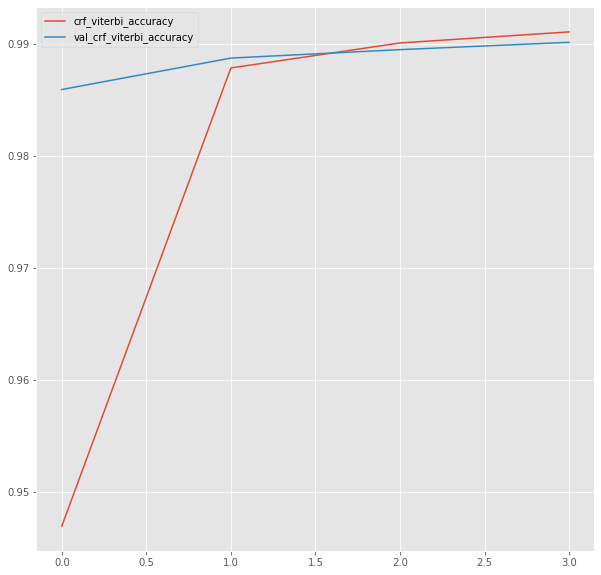

In [42]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(hist["crf_viterbi_accuracy"])
plt.plot(hist["val_crf_viterbi_accuracy"])
plt.legend(['crf_viterbi_accuracy','val_crf_viterbi_accuracy'])
plt.show()


In [38]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])

In [39]:
def label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = label(y_pred)
test_labels = label(y_te)

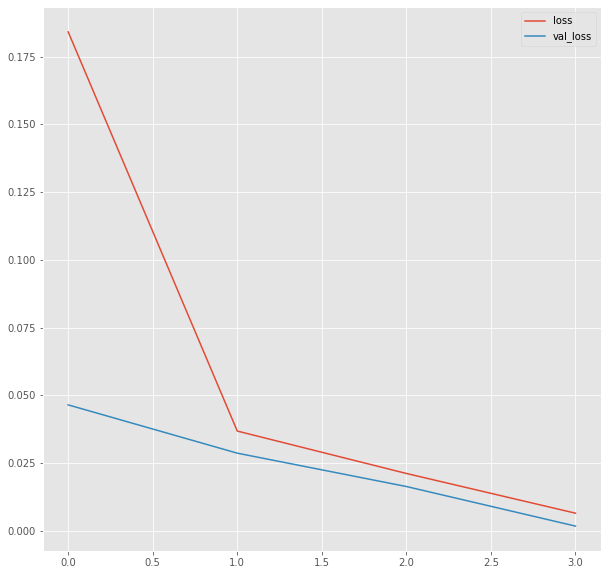

In [43]:
hist = pd.DataFrame(history.history)

plt.style.use("ggplot")
plt.figure(figsize=(10,10))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(['loss','val_loss'])
plt.show()

In [41]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from itertools import chain

def ner_report(y_true, y_pred):
 
    lb = LabelBinarizer()
    y_true_combined = lb.fit_transform(list(chain.from_iterable(y_true)))
    y_pred_combined = lb.transform(list(chain.from_iterable(y_pred)))
    tagset = list(sorted(set(lb.classes_)))
    tagset = tagset[:-2]
    print(tagset)
    class_indices = {cls: idx for idx, cls in enumerate(lb.classes_)}
    
    return classification_report(
        y_true_combined,
        y_pred_combined,
        labels = [class_indices[cls] for cls in tagset],
        target_names = tagset,
        digits=4
    )

print(ner_report(test_labels, pred_labels))

['B-art', 'B-eve', 'B-geo', 'B-gpe', 'B-nat', 'B-org', 'B-per', 'B-tim', 'I-art', 'I-eve', 'I-geo', 'I-gpe', 'I-nat', 'I-org', 'I-per']
              precision    recall  f1-score   support

       B-art     0.0000    0.0000    0.0000        49
       B-eve     0.0000    0.0000    0.0000        33
       B-geo     0.8412    0.9074    0.8730      3735
       B-gpe     0.9772    0.9123    0.9436      1596
       B-nat     0.0000    0.0000    0.0000        23
       B-org     0.7694    0.7088    0.7379      2071
       B-per     0.8471    0.8241    0.8354      1694
       B-tim     0.9057    0.8193    0.8603      2158
       I-art     0.0000    0.0000    0.0000        42
       I-eve     0.0000    0.0000    0.0000        33
       I-geo     0.7997    0.7963    0.7980       707
       I-gpe     1.0000    0.3750    0.5455        16
       I-nat     0.0000    0.0000    0.0000         5
       I-org     0.7775    0.7984    0.7878      1786
       I-per     0.8327    0.9132    0.8711      1739

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
